Key Statistics:
Total Participants: 97220 individuals across all surveyed countries.
Gender Distribution:
Male Participants: 45995 (47.3%)
Female Participants: 51130 (52.6%)


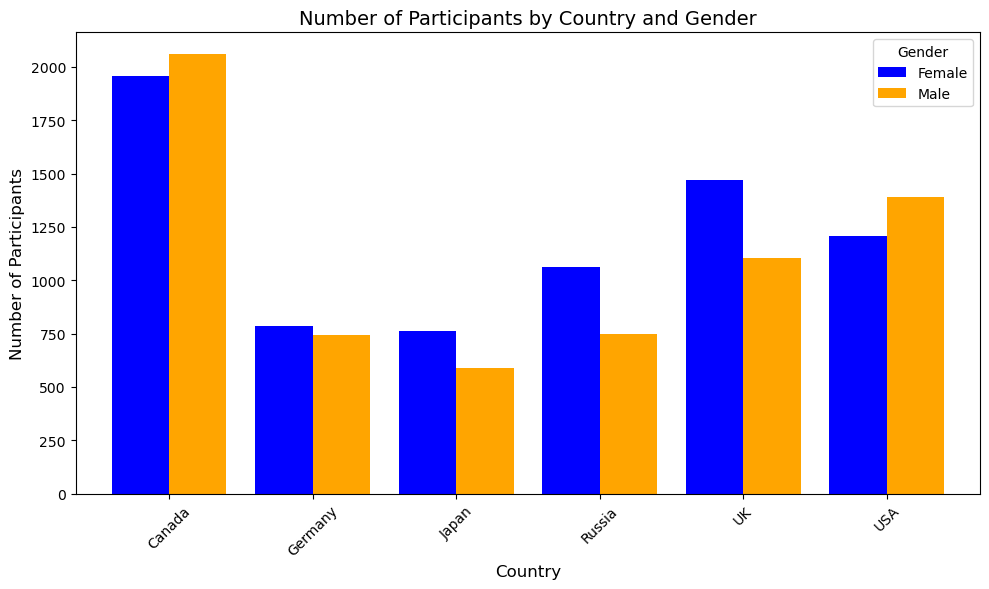

Plot saved as participants_by_country_gender.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define country and gender mappings
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
g8_codes = [840, 124, 250, 276, 380, 392, 643, 826]
gender_map = {1: "Male", 2: "Female"}

# Load your dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Group by country and gender, and aggregate the counts
participants_by_country_gender = data.groupby(['Country', 'Sex']).size().reset_index(name='Count')

# Map country codes and gender codes to their respective names
participants_by_country_gender['Country'] = participants_by_country_gender['Country'].map(country_map)
participants_by_country_gender['Gender'] = participants_by_country_gender['Sex'].map(gender_map)

# Aggregate to ensure no duplicates
participants_by_country_gender_agg = (
    participants_by_country_gender.groupby(['Country', 'Gender'])['Count']
    .sum()
    .reset_index()
)

# Pivot the data for plotting
pivot_data = participants_by_country_gender_agg.pivot(index='Country', columns='Gender', values='Count').fillna(0)

# Calculate key statistics
total_participants = data['Sex'].count()
male_participants = data[data['Sex'] == 1]['Sex'].count()
female_participants = data[data['Sex'] == 2]['Sex'].count()

# Calculate gender distribution percentages
male_percentage = (male_participants / total_participants) * 100
female_percentage = (female_participants / total_participants) * 100

# Display key statistics
print("Key Statistics:")
print(f"Total Participants: {total_participants} individuals across all surveyed countries.")
print(f"Gender Distribution:")
print(f"Male Participants: {male_participants} ({male_percentage:.1f}%)")
print(f"Female Participants: {female_participants} ({female_percentage:.1f}%)")

# Plot the grouped bar chart
ax = pivot_data.plot(kind='bar', figsize=(10, 6), width=0.8, color=['blue', 'orange'])

# Add labels and title
plt.title("Number of Participants by Country and Gender", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Save the plot as an image
plot_file_path = 'participants_by_country_gender.png'
plt.tight_layout()
plt.savefig(plot_file_path)
plt.show()

print(f"Plot saved as {plot_file_path}")


Mean Age by Country:
   Country   Mean_Age
0      NaN  46.825697
1      NaN  42.551346
2      NaN  53.736900
3      NaN  36.590833
4      NaN  49.044154
..     ...        ...
61     USA  43.422188
62     NaN  49.830000
63     NaN  35.871200
64     NaN  38.309244
65     NaN  48.310962

[66 rows x 2 columns]

Overall Mean Age of Participants: 42.93


<Figure size 1000x600 with 0 Axes>

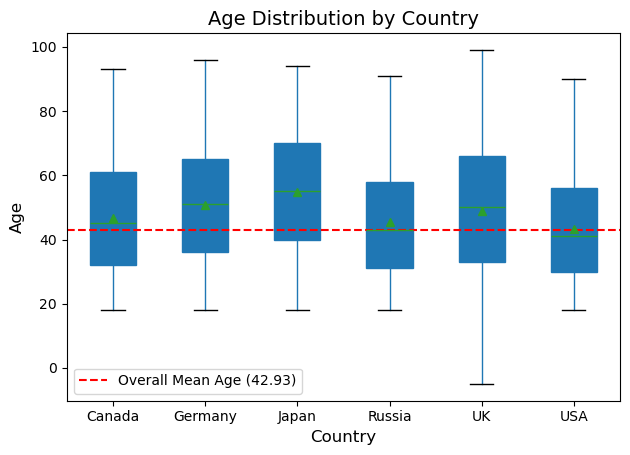

Box plot saved as age_distribution_by_country.png


In [2]:
# Re-importing libraries after reset
import pandas as pd
import matplotlib.pyplot as plt

# Reloading the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'
data = pd.read_csv(file_path)

# Define country map
country_map = {
    840: "USA", 124: "Canada", 250: "Franc", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}

# Calculate the mean age for each country and the overall mean
mean_age_by_country = data.groupby('Country')['Age'].mean().reset_index(name='Mean_Age')
mean_age_by_country['Country'] = mean_age_by_country['Country'].map(country_map)

# Calculate the overall mean age
overall_mean_age = data['Age'].mean()

# Display the mean age by country and overall mean
print("Mean Age by Country:")
print(mean_age_by_country)
print(f"\nOverall Mean Age of Participants: {overall_mean_age:.2f}")

# Create a box plot for age by country
plt.figure(figsize=(10, 6))
data['Country'] = data['Country'].map(country_map)  # Map country codes to names
boxplot = data.boxplot(column='Age', by='Country', grid=False, patch_artist=True, showmeans=True)

# Add labels and title
plt.title("Age Distribution by Country", fontsize=14)
plt.suptitle("")  # Remove the default subtitle from boxplot
plt.xlabel("Country", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Highlight the overall mean age on the plot
plt.axhline(overall_mean_age, color='red', linestyle='--', label=f"Overall Mean Age ({overall_mean_age:.2f})")
plt.legend()

# Save the box plot as an image
boxplot_file_path = 'age_distribution_by_country.png'
plt.tight_layout()
plt.savefig(boxplot_file_path)
plt.show()

print(f"Box plot saved as {boxplot_file_path}")


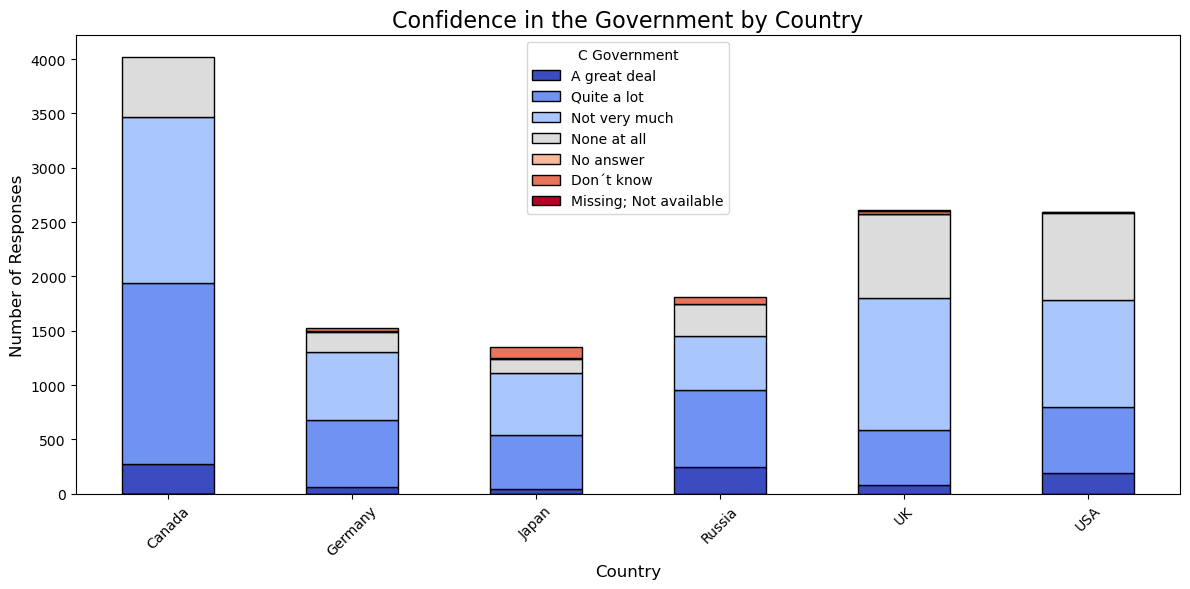


Country-wise Distribution for Confidence in the Government:
C Government  A great deal  Quite a lot  Not very much  None at all  \
Country                                                               
Canada                 269         1671           1529          549   
Germany                 64          611            629          180   
Japan                   43          496            568          136   
Russia                 246          711            497          291   
UK                      80          506           1213          775   
USA                    190          610            986          793   

C Government  No answer  Don´t know  Missing; Not available  
Country                                                      
Canada                0           0                       0  
Germany               9          35                       0  
Japan                 8         102                       0  
Russia                2          63                       0 

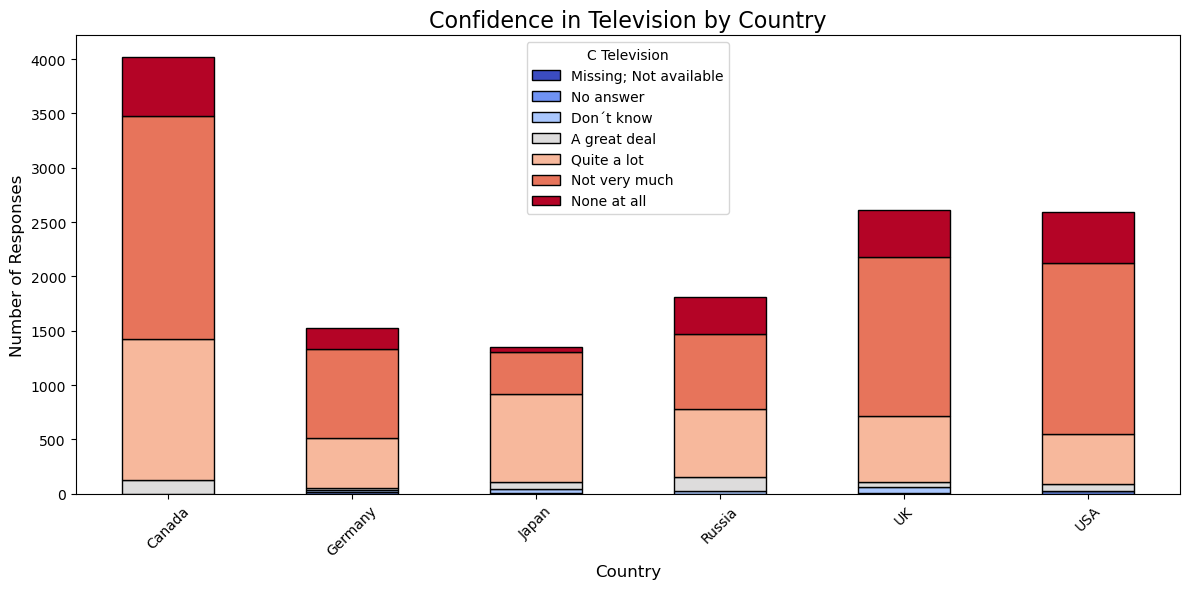


Country-wise Distribution for Confidence in Television:
C Television  Missing; Not available  No answer  Don´t know  A great deal  \
Country                                                                     
Canada                             0          0           0           128   
Germany                            0         13          20            18   
Japan                              0          7          35            69   
Russia                             0          1          20           136   
UK                                 4          3          54            47   
USA                                0         23           1            66   

C Television  Quite a lot  Not very much  None at all  
Country                                                
Canada               1297           2053          540  
Germany               465            814          198  
Japan                 804            387           51  
Russia                623            691      

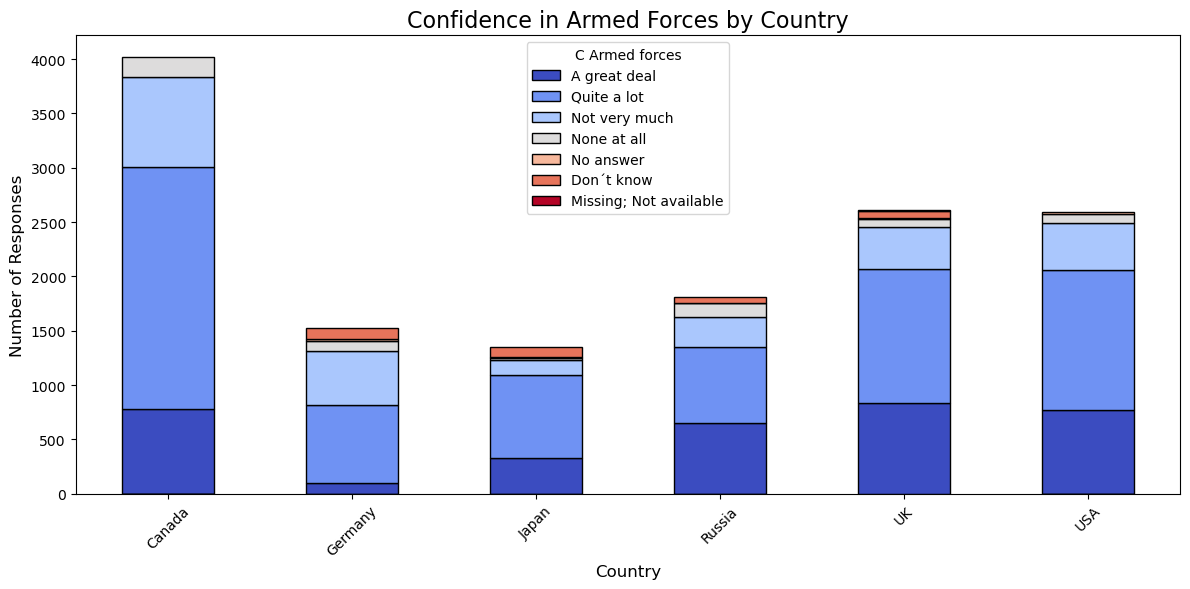


Country-wise Distribution for Confidence in Armed Forces:
C Armed forces  A great deal  Quite a lot  Not very much  None at all  \
Country                                                                 
Canada                   780         2225            831          182   
Germany                  100          717            500           90   
Japan                    326          764            143           19   
Russia                   646          701            278          130   
UK                       830         1237            386           77   
USA                      768         1293            428           83   

C Armed forces  No answer  Don´t know  Missing; Not available  
Country                                                        
Canada                  0           0                       0  
Germany                17         104                       0  
Japan                   7          94                       0  
Russia                  2          5

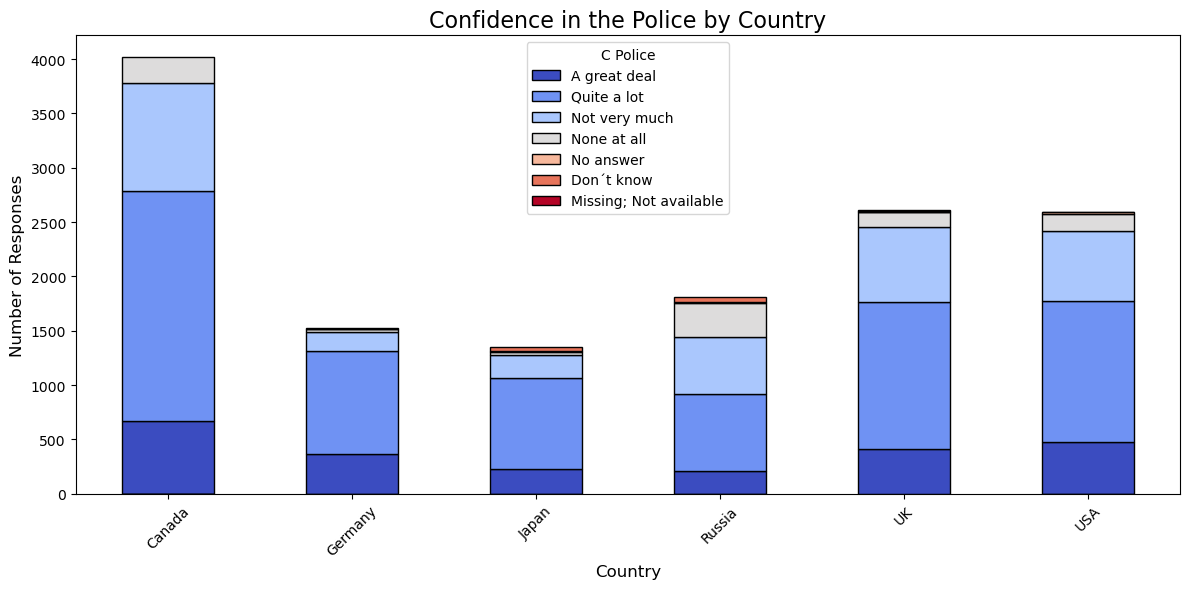


Country-wise Distribution for Confidence in the Police:
C Police  A great deal  Quite a lot  Not very much  None at all  No answer  \
Country                                                                      
Canada             671         2117            992          238          0   
Germany            366          946            175           25          3   
Japan              225          839            209           30          6   
Russia             213          704            527          315          3   
UK                 414         1349            696          131          3   
USA                480         1298            636          164         17   

C Police  Don´t know  Missing; Not available  
Country                                       
Canada             0                       0  
Germany           13                       0  
Japan             44                       0  
Russia            48                       0  
UK                12                

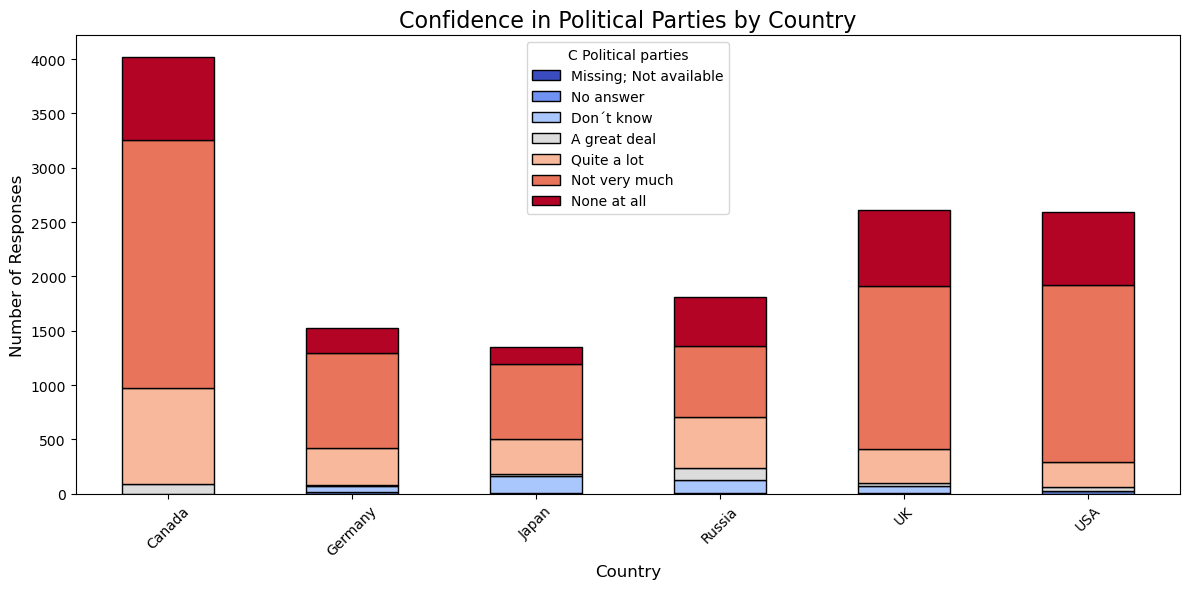


Country-wise Distribution for Confidence in Political Parties:
C Political parties  Missing; Not available  No answer  Don´t know  \
Country                                                              
Canada                                    0          0           0   
Germany                                   0         18          48   
Japan                                     0          7         152   
Russia                                    0          2         126   
UK                                        4          6          57   
USA                                       0         22           3   

C Political parties  A great deal  Quite a lot  Not very much  None at all  
Country                                                                     
Canada                         87          888           2285          758  
Germany                        12          342            876          232  
Japan                          23          324            688      

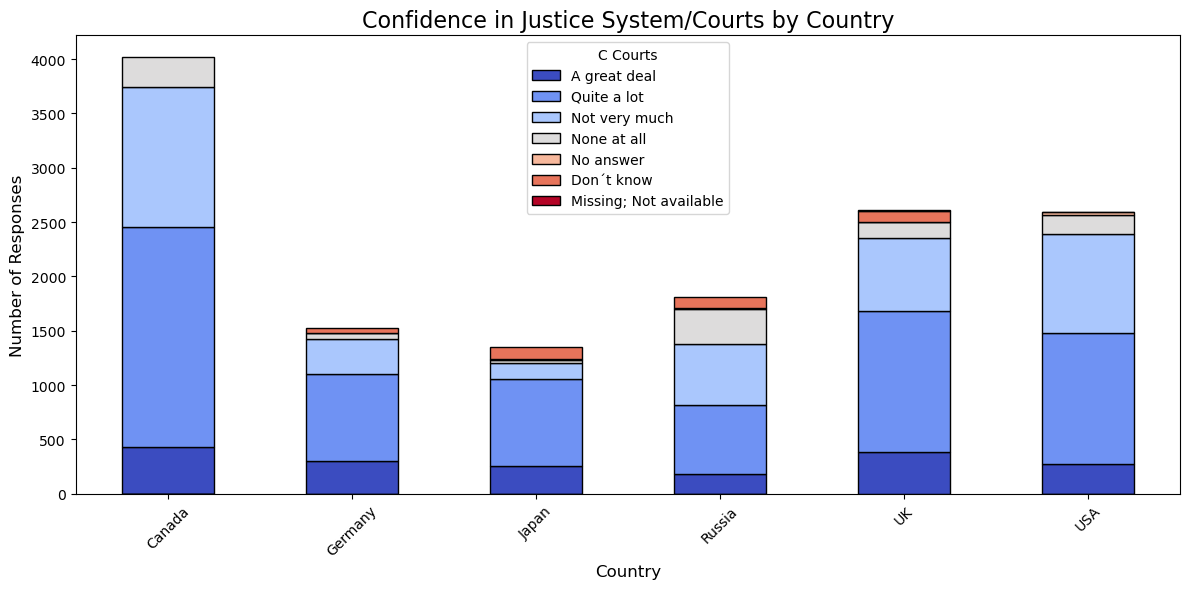


Country-wise Distribution for Confidence in Justice System/Courts:
C Courts  A great deal  Quite a lot  Not very much  None at all  No answer  \
Country                                                                      
Canada             426         2030           1286          276          0   
Germany            303          802            320           51          5   
Japan              251          803            152           26          7   
Russia             183          634            565          322          3   
UK                 383         1296            670          150          3   
USA                275         1204            907          181         26   

C Courts  Don´t know  Missing; Not available  
Country                                       
Canada             0                       0  
Germany           47                       0  
Japan            114                       0  
Russia           103                       0  
UK               101     

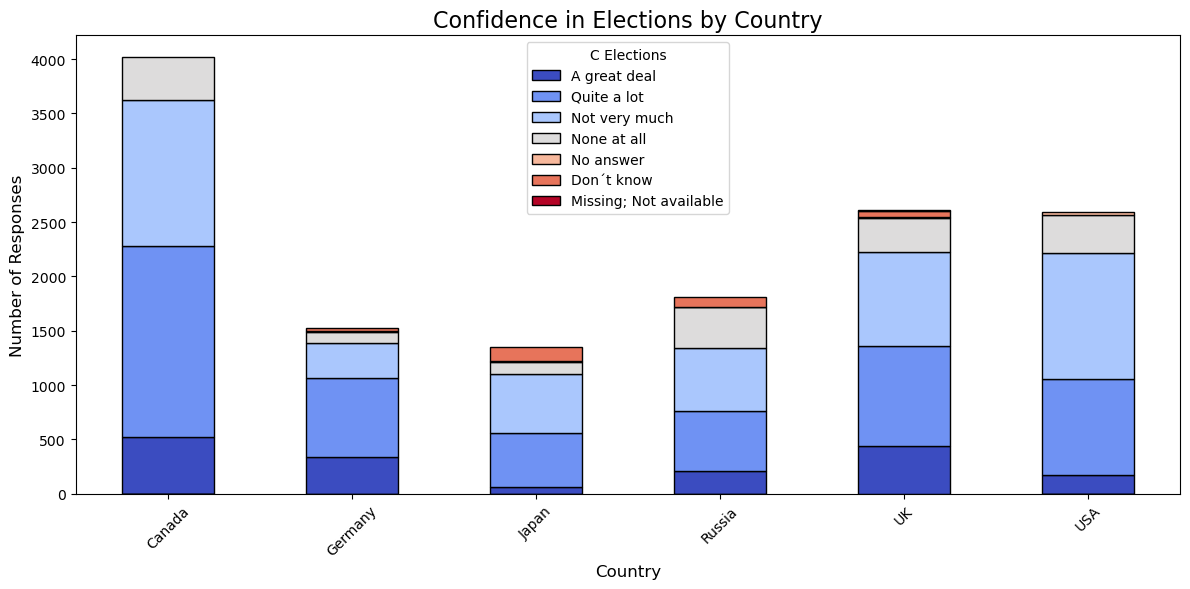


Country-wise Distribution for Confidence in Elections:
C Elections  A great deal  Quite a lot  Not very much  None at all  No answer  \
Country                                                                         
Canada                522         1758           1340          398          0   
Germany               341          721            325          102         10   
Japan                  60          500            542          113          9   
Russia                209          548            580          381          3   
UK                    441          918            869          314          4   
USA                   171          883           1158          353         31   

C Elections  Don´t know  Missing; Not available  
Country                                          
Canada                0                       0  
Germany              29                       0  
Japan               129                       0  
Russia               89                      

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define country and variable mappings
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

variables_info = {
    "C Government": "Confidence in the Government",
    "C Television": "Confidence in Television",
    "C Armed forces": "Confidence in Armed Forces",
    "C Police": "Confidence in the Police",
    "C Political parties": "Confidence in Political Parties",
    "C Courts": "Confidence in Justice System/Courts",
    "C Elections": "Confidence in Elections"
}



response_mapping = {
    1: "A great deal",
    2: "Quite a lot",
    3: "Not very much",
    4: "None at all",
    -5: "Missing; Not available",
    -1: "Don´t know",
    -2: "No answer"

    
}

# Analyze and visualize each variable for each country
for var, description in variables_info.items():
    # Create a country-wise distribution of responses
    country_response_counts = data.groupby(['Country', var]).size().unstack(fill_value=0)
    country_response_counts.rename(columns=response_mapping, inplace=True)
    
    # Plot the distribution for each country
    country_response_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm', edgecolor='black')
    plt.title(f"{description} by Country", fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Number of Responses", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot as an image
    plot_file_path = f"{var}_by_country_distribution.png"
    plt.savefig(plot_file_path)
    plt.show()

    # Display the table for reference
    print(f"\nCountry-wise Distribution for {description}:")
    print(country_response_counts)

# Explore relationships between variables
sns.set(style="whitegrid")



In [4]:
import pandas as pd

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country and variable mappings
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Variables to analyze
variables_info = {
    "C Government": "Confidence in the Government",
    "C Television": "Confidence in Television",
    "C Armed forces": "Confidence in Armed Forces",
    "C Police": "Confidence in the Police",
    "C Political parties": "Confidence in Political Parties",
    "C Courts": "Confidence in Justice System/Courts",
    "C Elections": "Confidence in Elections"
}


# Filter the dataset to include only the specified response values (1–4)
valid_responses = [1, 2, 3, 4]
filtered_data = data[
    (data[list(variables_info.keys())].isin(valid_responses)).all(axis=1)
]

# Calculate the average response for each variable by country
averages_by_country = filtered_data.groupby('Country')[list(variables_info.keys())].mean().reset_index()

# Rename columns for better readability
averages_by_country.rename(columns=variables_info, inplace=True)

# Calculate the overall average for each country
averages_by_country['Overall Average'] = averages_by_country.iloc[:, 1:].mean(axis=1)

# Display the resulting table
print("Average Responses by Country with Overall Average:")
print(averages_by_country)




Average Responses by Country with Overall Average:
   Country  Confidence in the Government  Confidence in Television  \
0   Canada                      2.586859                  2.747885   
1  Germany                      2.618902                  2.792683   
2    Japan                      2.630332                  2.351659   
3   Russia                      2.503937                  2.712598   
4       UK                      3.046442                  2.891777   
5      USA                      2.927577                  2.959013   

   Confidence in Armed Forces  Confidence in the Police  \
0                    2.103285                  2.198357   
1                    2.411585                  1.900152   
2                    1.880569                  2.024645   
3                    1.961942                  2.539370   
4                    1.886664                  2.226246   
5                    1.934739                  2.188619   

   Confidence in Political Parties  Confiden

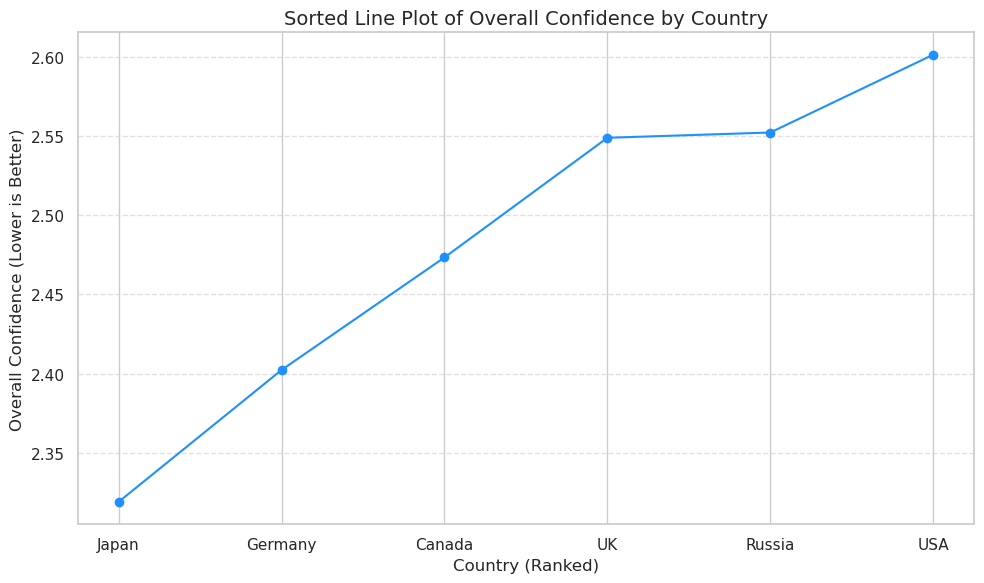

Sorted Line Plot saved at: sorted_line_confidence_by_country_without_rank.png


In [5]:
# Sorted Line Plot without Rank Annotations

# Data for Overall Averages
overall_data = {
    "Country": ["Canada", "Germany", "Japan", "Russia", "UK", "USA"],
    "Overall Average": [2.473405, 2.402330, 2.319025, 2.552306, 2.548968, 2.601444]
}

# Create a DataFrame
df = pd.DataFrame(overall_data)

# Rank the countries (lower value = higher confidence, so ascending order)
df['Rank'] = df['Overall Average'].rank(method='min', ascending=True).astype(int)

# Sort by Rank for better visualization
df = df.sort_values('Rank')

# Plot Sorted Line Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Country'], df['Overall Average'], marker='o', color='dodgerblue', label='Overall Average')

# Add labels, title, and legend
plt.title("Sorted Line Plot of Overall Confidence by Country", fontsize=14)
plt.xlabel("Country (Ranked)", fontsize=12)
plt.ylabel("Overall Confidence (Lower is Better)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
sorted_line_plot_path = 'sorted_line_confidence_by_country_without_rank.png'
plt.savefig(sorted_line_plot_path)
plt.show()

print(f"Sorted Line Plot saved at: {sorted_line_plot_path}")


/tmp/ipykernel_945999/3508091045.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Q235_Mapped'] = filtered_data['Strong Leader'].map(response_mapping)


<Figure size 1200x600 with 0 Axes>

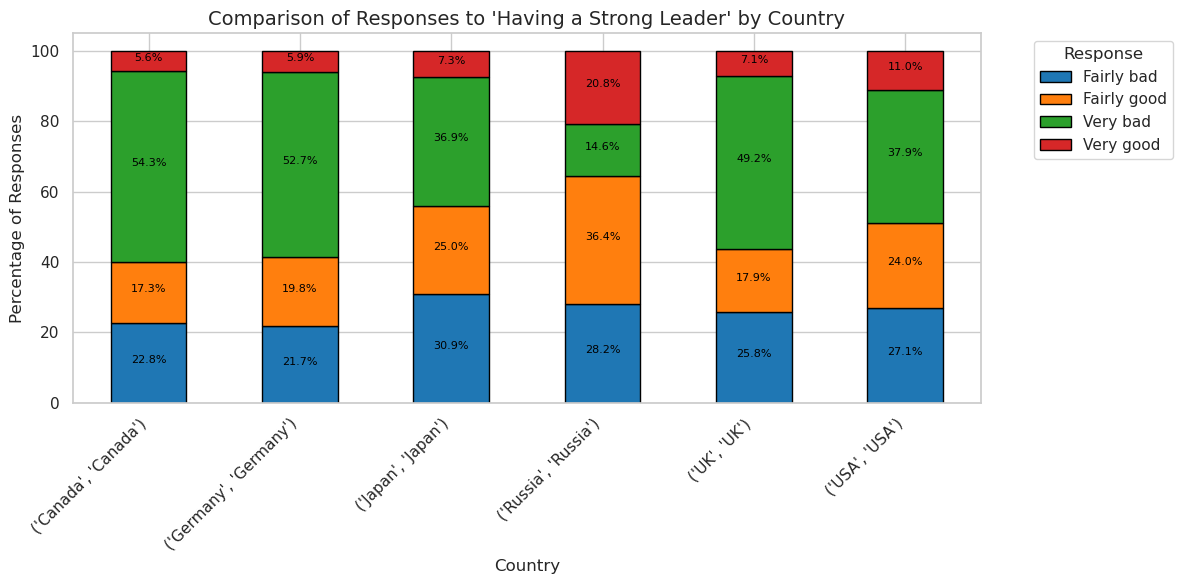

Plot saved at: q235_strong_leader_custom_colors.png


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Define response mapping for Q235
response_mapping = {
    1: "Very good",
    2: "Fairly good",
    3: "Fairly bad",
    4: "Very bad",
    -1: "Don’t know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing/Not available"
}

# Filter Q235 to include only valid responses (1 to 4)
valid_responses = [1, 2, 3, 4]
filtered_data = data[data['Strong Leader'].isin(valid_responses)]

# Map responses for readability
filtered_data['Q235_Mapped'] = filtered_data['Strong Leader'].map(response_mapping)

# Calculate percentage of responses within each country
response_percentages = filtered_data.groupby(['Country', 'Q235_Mapped']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)

# Plot a stacked bar chart with custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Define your custom colors
plt.figure(figsize=(12, 6))
response_percentages.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=custom_colors, edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category in response_percentages.columns:
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=8, color="black"
            )

# Adjust x-axis labels and formatting
plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Having a Strong Leader' by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Responses", fontsize=12)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plot_file_path = 'q235_strong_leader_custom_colors.png'
plt.savefig(plot_file_path)
plt.show()

print(f"Plot saved at: {plot_file_path}")


/tmp/ipykernel_945999/1173518553.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Q236_Mapped'] = filtered_data['Expert Non Govt Person'].map(response_mapping)


<Figure size 1200x600 with 0 Axes>

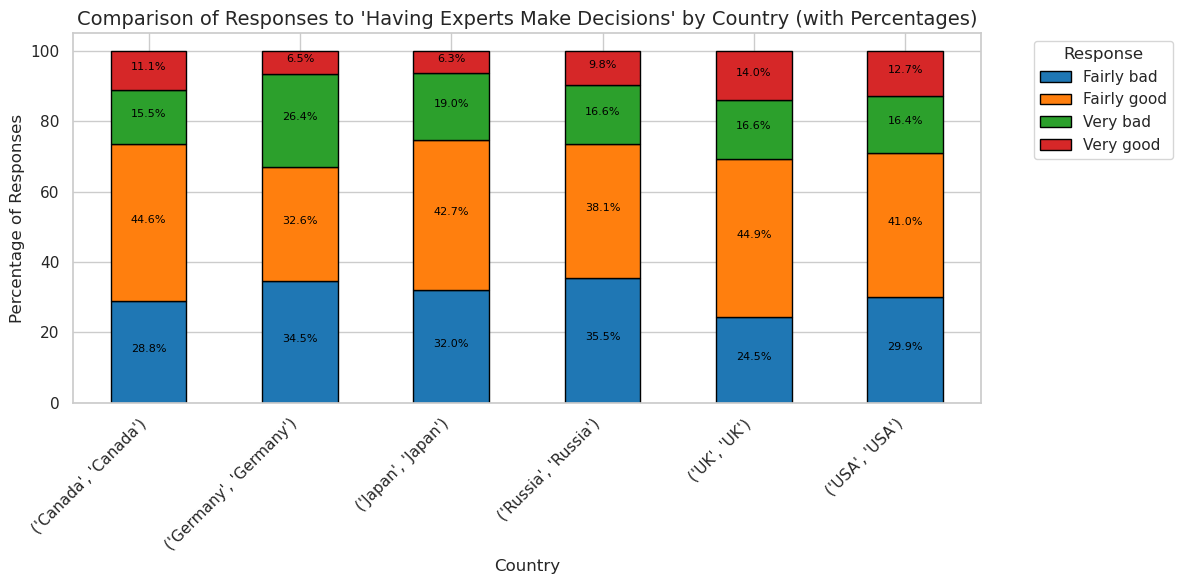

Plot for 'Having Experts Make Decisions' saved at: q236_experts_make_decisions_custom_colors.png


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Define response mapping for Q236
response_mapping = {
    1: "Very good",
    2: "Fairly good",
    3: "Fairly bad",
    4: "Very bad",
    -1: "Don’t know",
    -2: "No answer",
    -4: "Not asked",
    -5: "Missing/Not available"
}

# Filter Q236 to include only valid responses (1 to 4)
valid_responses = [1, 2, 3, 4]
filtered_data = data[data['Expert Non Govt Person'].isin(valid_responses)]

# Map responses for readability
filtered_data['Q236_Mapped'] = filtered_data['Expert Non Govt Person'].map(response_mapping)

# Calculate percentage of responses within each country
response_percentages = filtered_data.groupby(['Country', 'Q236_Mapped']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)

# Plot a stacked bar chart with custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Replace with your desired color codes
plt.figure(figsize=(12, 6))
response_percentages.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=custom_colors, edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category in response_percentages.columns:
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=8, color="black"
            )

plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Having Experts Make Decisions' by Country (with Percentages)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Responses", fontsize=12)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plot_with_custom_colors_path = 'q236_experts_make_decisions_custom_colors.png'
plt.savefig(plot_with_custom_colors_path)
plt.show()

print(f"Plot for 'Having Experts Make Decisions' saved at: {plot_with_custom_colors_path}")


<Figure size 1200x600 with 0 Axes>

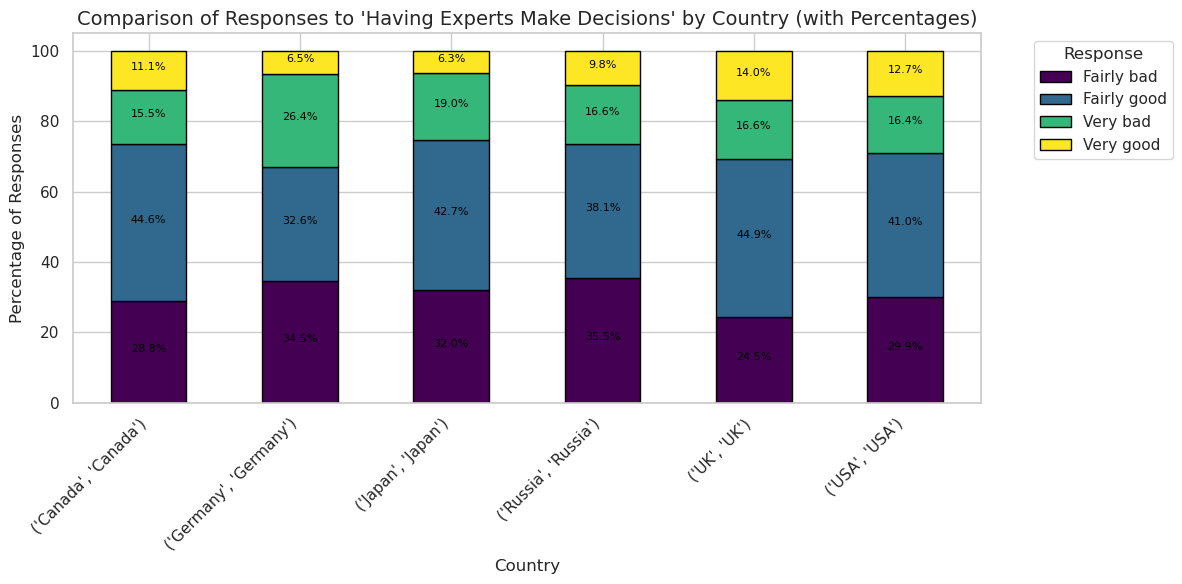

Plot saved at: q236_experts_make_decisions_with_percentages.png


In [8]:
# Simplified code with percentage annotations

# Plot a stacked bar chart with percentages
plt.figure(figsize=(12, 6))
ax = response_percentages.plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category_index, category in enumerate(response_percentages.columns):
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=8, color="black"
            )

# Customize x-axis to show unique country names
plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Having Experts Make Decisions' by Country (with Percentages)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Responses", fontsize=12)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plot_with_percentages_path = 'q236_experts_make_decisions_with_percentages.png'
plt.savefig(plot_with_percentages_path)
plt.show()

print(f"Plot saved at: {plot_with_percentages_path}")


<Figure size 1200x600 with 0 Axes>

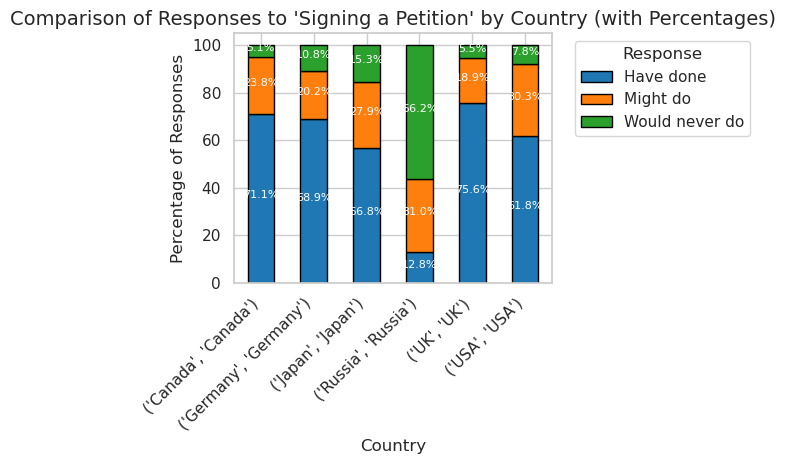

Plot saved at: q209_signing_a_petition_custom_colors.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Define response mapping for Q209
response_mapping = {
    1: "Have done",
    2: "Might do",
    3: "Would never do",
    -1: "Don’t know",
    -2: "No answer",
    -4: "Not asked in survey",
    -5: "Missing/Not available"
}

# Filter Q209 to include only valid responses (1 to 3)
valid_responses = [1, 2, 3]
filtered_data = data.loc[data['Signing a petition'].isin(valid_responses)].copy()

# Map responses for readability
filtered_data['Q209_Mapped'] = filtered_data['Signing a petition'].map(response_mapping)

# Calculate percentage of responses within each country
response_percentages = filtered_data.groupby(['Country', 'Q209_Mapped']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)

# Plot a stacked bar chart with custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Customize colors as needed
plt.figure(figsize=(12, 6))
response_percentages.plot(
    kind='bar', stacked=True, color=custom_colors, edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category in response_percentages.columns:
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=8, color="white"
            )

# Ensure unique country names appear on the x-axis
plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Signing a Petition' by Country (with Percentages)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Responses", fontsize=12)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plot_with_custom_colors_path = 'q209_signing_a_petition_custom_colors.png'
plt.savefig(plot_with_custom_colors_path)
plt.show()

print(f"Plot saved at: {plot_with_custom_colors_path}")


<Figure size 1200x600 with 0 Axes>

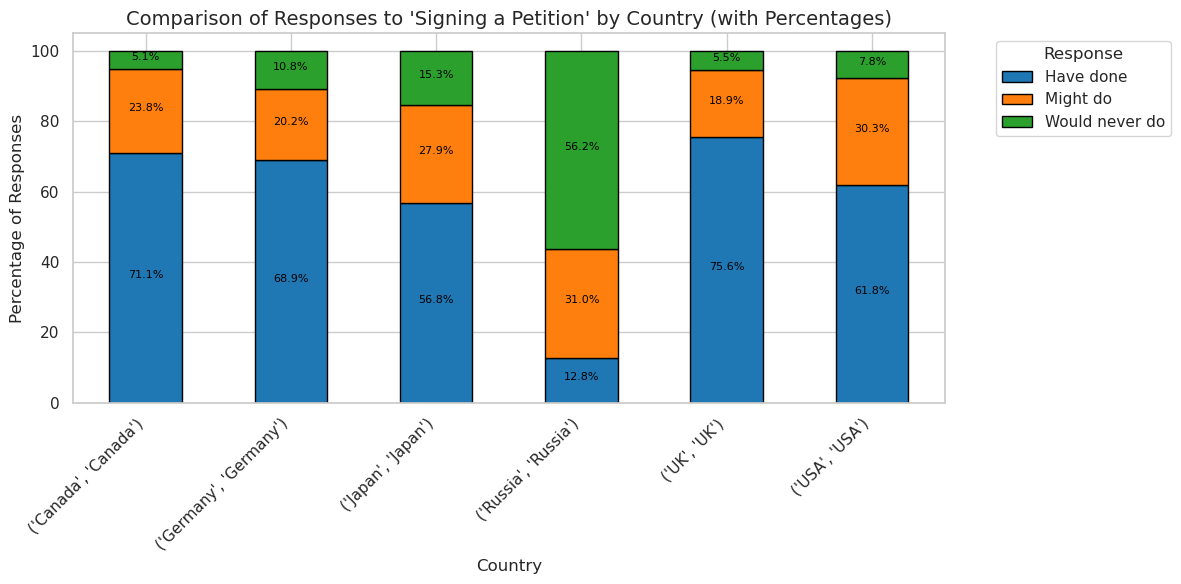

Plot for 'Signing a Petition' saved at: q209_signing_a_petition_custom_colors.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Define response mapping for Q209
response_mapping = {
    1: "Have done",
    2: "Might do",
    3: "Would never do",
    -1: "Don’t know",
    -2: "No answer",
    -4: "Not asked in survey",
    -5: "Missing/Not available"
}

# Filter Q209 to include only valid responses (1 to 3)
valid_responses = [1, 2, 3]
filtered_data = data.loc[data['Signing a petition'].isin(valid_responses)].copy()

# Map responses for readability
filtered_data['Q209_Mapped'] = filtered_data['Signing a petition'].map(response_mapping)

# Calculate percentage of responses within each country
response_percentages = filtered_data.groupby(['Country', 'Q209_Mapped']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)

# Plot a stacked bar chart with custom colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Replace with your desired color codes
plt.figure(figsize=(12, 6))
response_percentages.plot(
    kind='bar', stacked=True, figsize=(12, 6), color=custom_colors, edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category in response_percentages.columns:
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=8, color="black"
            )

plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Signing a Petition' by Country (with Percentages)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage of Responses", fontsize=12)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plot_with_custom_colors_path = 'q209_signing_a_petition_custom_colors.png'
plt.savefig(plot_with_custom_colors_path)
plt.show()

print(f"Plot for 'Signing a Petition' saved at: {plot_with_custom_colors_path}")


<Figure size 1600x800 with 0 Axes>

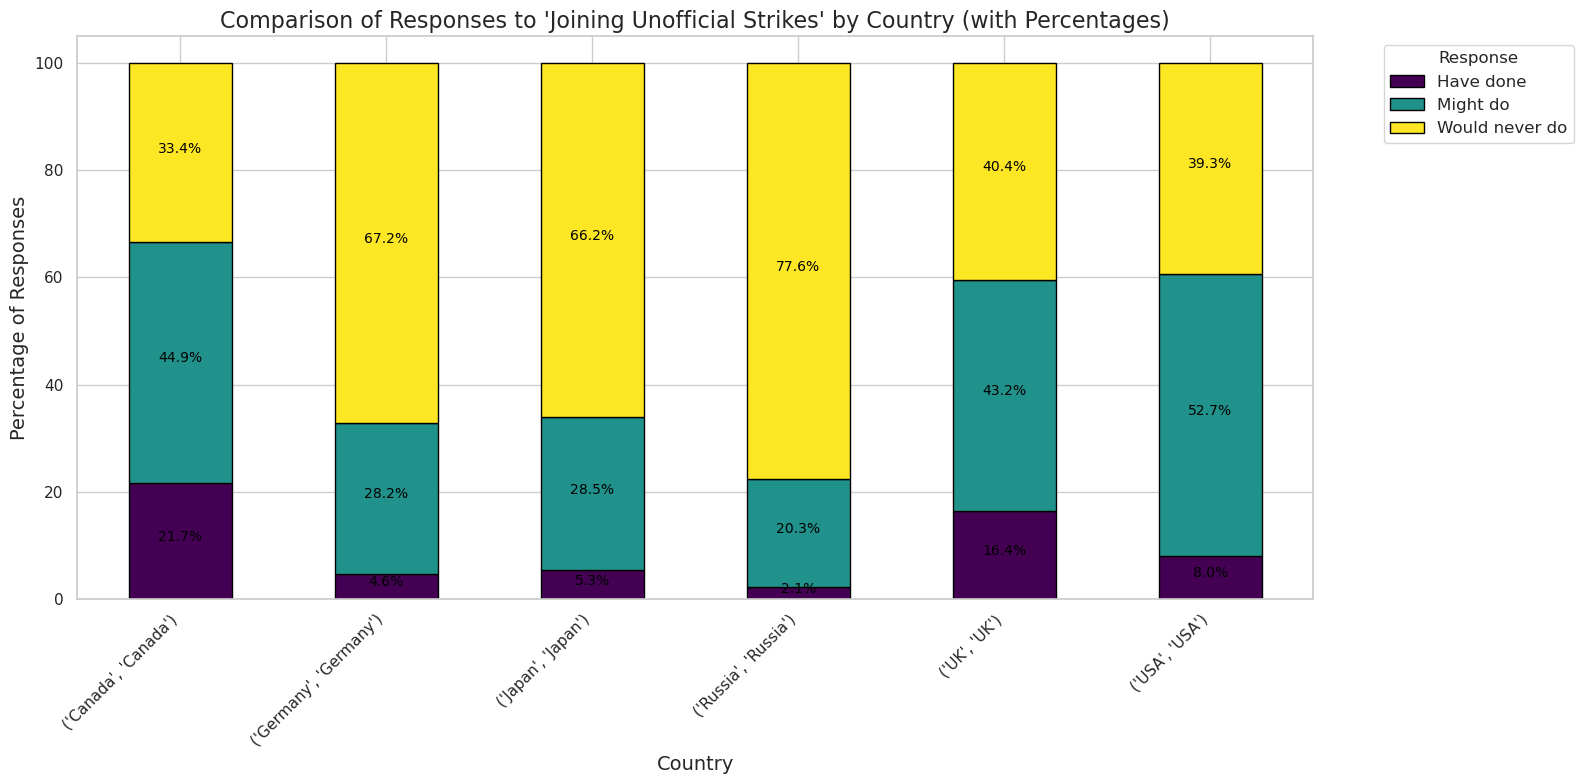

Plot saved at: q212_joining_unofficial_strikes_by_country.png


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
data['Country'] = data['Country'].map(country_map)

# Define response mapping for Q212
response_mapping = {
    1: "Have done",
    2: "Might do",
    3: "Would never do",
    -1: "Don’t know",
    -2: "No answer",
    -4: "Not asked in survey",
    -5: "Missing/Not available"
}

# Filter Q212 to include only valid responses (1 to 3)
valid_responses = [1, 2, 3]
filtered_data = data.loc[data['Joining unofficial strikes'].isin(valid_responses)].copy()  # Use .loc and .copy() to avoid warnings

# Map responses for readability
filtered_data['Q212_Mapped'] = filtered_data['Joining unofficial strikes'].map(response_mapping)

# Calculate percentage of responses within each country
response_percentages = filtered_data.groupby(['Country', 'Q212_Mapped']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack(fill_value=0)

# Plot a stacked bar chart with percentages
plt.figure(figsize=(16, 8))  # Increased figure size for better visualization
response_percentages.plot(
    kind='bar', stacked=True, figsize=(16, 8), colormap='viridis', edgecolor='black'
)

# Add percentage labels to each bar segment
for country_index, country in enumerate(response_percentages.index):
    cumulative = 0  # Track the cumulative percentage for correct placement
    for category in response_percentages.columns:
        percentage = response_percentages.loc[country, category]
        if percentage > 0:  # Only annotate if there's a non-zero percentage
            cumulative += percentage
            plt.text(
                country_index,  # X position
                cumulative - (percentage / 2),  # Y position centered within the segment
                f"{percentage:.1f}%",  # Text to display
                ha="center", fontsize=10, color="black"  # Larger font size for better readability
            )

# Ensure unique country names appear on the x-axis
plt.xticks(ticks=range(len(response_percentages.index)), labels=response_percentages.index, rotation=45, ha='right')

# Add labels, title, and legend
plt.title("Comparison of Responses to 'Joining Unofficial Strikes' by Country (with Percentages)", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Percentage of Responses", fontsize=14)
plt.legend(title="Response", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Save the plot
plot_with_larger_size_path = 'q212_joining_unofficial_strikes_by_country.png'
plt.savefig(plot_with_larger_size_path)
plt.show()

print(f"Plot saved at: {plot_with_larger_size_path}")


In [12]:
from scipy.stats import kruskal, mannwhitneyu

# Subset the data for selected countries
selected_countries = [840, 276, 826]  # USA, Germany, UK
df_subset = df[df["Country"].isin(selected_countries)].copy()

# Rename columns for readability
df_subset = df_subset.rename(columns={"C_Government": "gov_conf"})

# Ensure valid responses
valid_responses = [1, 2, 3, 4]
df_subset = df_subset[df_subset["gov_conf"].isin(valid_responses)]

# Perform Kruskal-Wallis H-test
groups = [group["gov_conf"].values for _, group in df_subset.groupby("Country")]
stat, p_value = kruskal(*groups)

print("Kruskal-Wallis H-test:")
print(f"Statistic: {stat}, P-value: {p_value}")

# Post-hoc pairwise comparisons if significant
if p_value < 0.05:
    countries = {840: "USA", 276: "Germany", 826: "UK"}
    for i, country1 in enumerate(selected_countries):
        for country2 in selected_countries[i + 1:]:
            group1 = df_subset[df_subset["Country"] == country1]["gov_conf"]
            group2 = df_subset[df_subset["Country"] == country2]["gov_conf"]
            
            # Check group sizes
            if len(group1) == 0 or len(group2) == 0:
                print(f"Skipping comparison between {countries[country1]} and {countries[country2]} due to empty group.")
                continue
            
            # Perform Mann-Whitney U test
            stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
            print(f"Comparison between {countries[country1]} and {countries[country2]}:")
            print(f"Statistic: {stat}, P-value: {p}")


KeyError: 'gov_conf'

In [2]:
import pandas as pd
import statsmodels.api as sm

# Load dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Rename columns for compatibility
df.columns = [col.replace(" ", "_") for col in df.columns]

# Define predictors and dependent variable
predictors = [
    "C_Elections", "C_Political_parties", "C_Police", "C_Courts",
    "C_Armed_forces", "C_Civil_services", "Importance_of_democracy",
    "Highest_educational_level", "Scale_of_incomes", "Age"
]
dependent_var = "C_Government"

# Define valid ranges for variables
valid_responses = [1, 2, 3, 4]  # Valid responses for confidence variables
valid_educ = list(range(1, 9))  # Education levels (1 to 11)
valid_income = list(range(1, 12))  # Income scale (1 to 11)
valid_demo = list(range(1, 11))  # Importance of democracy (1 to 10)

# Ensure valid responses for dependent and predictors
df = df[
    (df[dependent_var].isin(valid_responses)) &
    (df["C_Elections"].isin(valid_responses)) &
    (df["C_Political_parties"].isin(valid_responses)) &
    (df["C_Police"].isin(valid_responses)) &
    (df["C_Courts"].isin(valid_responses)) &
    (df["C_Armed_forces"].isin(valid_responses)) &
    (df["C_Civil_services"].isin(valid_responses)) &
    (df["Importance_of_democracy"].isin(valid_demo)) &
    (df["Highest_educational_level"].isin(valid_educ)) &
    (df["Scale_of_incomes"].isin(valid_income)) &
    (df["Age"] > 0)  # Ensure Age is positive
].copy()

# Run a regression for each country
selected_countries = {840: "USA", 276: "Germany", 826: "UK"}
for country_code, country_name in selected_countries.items():
    print(f"\nRegression Results for {country_name}:")
    
    # Subset data for the country
    country_data = df[df["Country"] == country_code].dropna(subset=predictors + [dependent_var])
    
    # Define dependent and independent variables
    y = country_data[dependent_var]
    X = country_data[predictors]
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X)
    result = model.fit()
    
    # Print the summary
    print(result.summary())



Regression Results for USA:
                            OLS Regression Results                            
Dep. Variable:           C_Government   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.72e-215
Time:                        01:26:49   Log-Likelihood:                -2682.9
No. Observations:                2420   AIC:                             5388.
Df Residuals:                    2409   BIC:                             5452.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Load dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your dataset file path
df = pd.read_csv(file_path)

# Rename columns for compatibility
df.columns = [col.replace(" ", "_") for col in df.columns]

# Define predictors and dependent variable
predictors = [
    "C_Elections", "C_Political_parties", "C_Police", "C_Courts",
    "C_Armed_forces", "C_Civil_services", "Importance_of_democracy",
    "Highest_educational_level", "Scale_of_incomes", "Age"
]
dependent_var = "C_Government"

# Define valid ranges for variables
valid_responses = [1, 2, 3, 4]  # Valid responses for confidence variables
valid_educ = list(range(1, 9))  # Education levels (1 to 11)
valid_income = list(range(1, 12))  # Income scale (1 to 11)
valid_demo = list(range(1, 11))  # Importance of democracy (1 to 10)

# Ensure valid responses for dependent and predictors
df = df[
    (df[dependent_var].isin(valid_responses)) &
    (df["C_Elections"].isin(valid_responses)) &
    (df["C_Political_parties"].isin(valid_responses)) &
    (df["C_Police"].isin(valid_responses)) &
    (df["C_Courts"].isin(valid_responses)) &
    (df["C_Armed_forces"].isin(valid_responses)) &
    (df["C_Civil_services"].isin(valid_responses)) &
    (df["Importance_of_democracy"].isin(valid_demo)) &
    (df["Highest_educational_level"].isin(valid_educ)) &
    (df["Scale_of_incomes"].isin(valid_income)) &
    (df["Age"] > 0)  # Ensure Age is positive
].copy()

# Run ordinal regression for each country
selected_countries = {840: "USA", 276: "Germany", 826: "UK"}
for country_code, country_name in selected_countries.items():
    print(f"\nOrdinal Regression Results for {country_name}:")
    
    # Subset data for the country
    country_data = df[df["Country"] == country_code].dropna(subset=predictors + [dependent_var])
    
    # Define dependent and independent variables
    y = country_data[dependent_var]
    X = country_data[predictors]
    
    # Fit the ordinal regression model
    model = OrderedModel(
        y, X, distr='logit'  # Logit distribution is typical for ordinal regression
    )
    result = model.fit(method='bfgs')
    
    # Print the summary
    print(result.summary())



Ordinal Regression Results for USA:
Optimization terminated successfully.
         Current function value: 1.041452
         Iterations: 41
         Function evaluations: 45
         Gradient evaluations: 45
                             OrderedModel Results                             
Dep. Variable:           C_Government   Log-Likelihood:                -2520.3
Model:                   OrderedModel   AIC:                             5067.
Method:            Maximum Likelihood   BIC:                             5142.
Date:                Mon, 27 Jan 2025                                         
Time:                        21:33:29                                         
No. Observations:                2420                                         
Df Residuals:                    2407                                         
Df Model:                          10                                         
                                coef    std err          z      P>|z|      [0.02

In [3]:
import pandas as pd

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}

# Map country codes to country names
data['Country_Name'] = data['Country'].map(country_map)

# Group by country and count the participants
participants_by_country = data.groupby('Country_Name')['Sex'].count().reset_index(name='Participants')

# Print the results
print(participants_by_country)

# Save the result to a CSV file for further inspection (optional)
participants_by_country.to_csv('participants_by_country.csv', index=False)

# Display total participants for double-checking
total_calculated_participants = participants_by_country['Participants'].sum()
print(f"Total participants calculated from grouped data: {total_calculated_participants}")


  Country_Name  Participants
0       Canada          4018
1      Germany          1528
2        Japan          1353
3       Russia          1810
4           UK          2609
5          USA          2596
Total participants calculated from grouped data: 13914


In [4]:
import pandas as pd

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country mapping
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}

# Map country codes to country names
data['Country_Name'] = data['Country'].map(country_map)

# Step 1: Verify total rows in the dataset
total_rows = data.shape[0]
print(f"Total rows in the dataset: {total_rows}")

# Step 2: Check for unmapped or missing country codes
unmapped_countries = data[data['Country_Name'].isna()]['Country'].unique()
print(f"Unmapped country codes: {unmapped_countries}")

# Step 3: Check for missing or invalid 'Sex' values
missing_sex_count = data['Sex'].isna().sum()
print(f"Number of rows with missing 'Sex': {missing_sex_count}")

# Step 4: Count all participants regardless of mapping
total_participants = data['Sex'].count()
print(f"Total participants in the dataset: {total_participants}")

# Step 5: Count participants for each country (only mapped G8 countries)
participants_by_country = data.groupby('Country_Name')['Sex'].count().reset_index(name='Participants')
print("\nParticipants by Country:")
print(participants_by_country)

# Calculate the total participants from the grouped data
total_calculated_participants = participants_by_country['Participants'].sum()
print(f"Total participants calculated from grouped data: {total_calculated_participants}")

# Save the participants by country to a CSV file for further inspection (optional)
participants_by_country.to_csv('participants_by_country.csv', index=False)


Total rows in the dataset: 97220
Unmapped country codes: [ 20  32  51  36  50  68  76 152 156 170 196 203 218 818 231 300 320 344
 360 356 364 368 400 398 404 417 410 422 434 446 504 462 484 104 496 458
 566 558 909 528 554 586 604 608 630 642 702 688 703 764 762 788 792 158
 804 858 860 862 704 716]
Number of rows with missing 'Sex': 0
Total participants in the dataset: 97220

Participants by Country:
  Country_Name  Participants
0       Canada          4018
1      Germany          1528
2        Japan          1353
3       Russia          1810
4           UK          2609
5          USA          2596
Total participants calculated from grouped data: 13914


In [9]:
import pandas as pd

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Define country and gender mappings
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}
gender_map = {1: "Male", 2: "Female"}

# Map country codes to country names and gender codes to labels
data['Country_Name'] = data['Country'].map(country_map)
data['Gender'] = data['Sex'].map(gender_map)

# Step 1: Count participants by country and gender
participants_by_country_gender = (
    data.groupby(['Country_Name', 'Gender'])['Sex']
    .count()
    .reset_index(name='Count')
)

# Step 2: Pivot to calculate Male and Female counts per country
gender_ratio = participants_by_country_gender.pivot(
    index='Country_Name', columns='Gender', values='Count'
).fillna(0)

# Step 3: Add Total and Ratios
gender_ratio['Total'] = gender_ratio.sum(axis=1)
gender_ratio['Male_Ratio'] = (gender_ratio['Male'] / gender_ratio['Total']) * 100
gender_ratio['Female_Ratio'] = (gender_ratio['Female'] / gender_ratio['Total']) * 100

# Step 4: Save the results to a CSV (optional)
gender_ratio.to_csv('gender_ratio_by_country.csv', index=True)

# Step 5: Display the results
print("\nParticipants by Country with Gender Ratios:")
print(gender_ratio)

# Calculate the overall total participants (for comparison)
total_calculated_participants = gender_ratio['Total'].sum()
print(f"\nTotal participants calculated from grouped data: {total_calculated_participants}")



Participants by Country with Gender Ratios:
Gender        Female  Male  Total  Male_Ratio  Female_Ratio
Country_Name                                               
Canada          1959  2059   4018   51.244400     48.755600
Germany          785   743   1528   48.625654     51.374346
Japan            763   590   1353   43.606800     56.393200
Russia          1064   746   1810   41.215470     58.784530
UK              1471  1105   2576   42.895963     57.104037
USA             1206  1390   2596   53.543914     46.456086

Total participants calculated from grouped data: 13881


In [10]:
import pandas as pd

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Map country codes to country names
country_map = {
    840: "USA", 124: "Canada", 250: "France", 276: "Germany",
    380: "Italy", 392: "Japan", 643: "Russia", 826: "UK"
}

# Add a mapped country name column
data['Country_Name'] = data['Country'].map(country_map)

# Find all unique country codes in the dataset
unique_countries = data['Country'].unique()

# Display unique countries and their mapped names
unique_countries_df = pd.DataFrame({'Country_Code': unique_countries})
unique_countries_df['Mapped_Name'] = unique_countries_df['Country_Code'].map(country_map)

print("List of countries in the dataset:")
print(unique_countries_df)


List of countries in the dataset:
    Country_Code Mapped_Name
0             20         NaN
1             32         NaN
2             51         NaN
3             36         NaN
4             50         NaN
..           ...         ...
61           840         USA
62           860         NaN
63           862         NaN
64           704         NaN
65           716         NaN

[66 rows x 2 columns]


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/preprocessed/filtered_wave_7.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Define G8 country codes
g8_codes = [840, 124, 250, 276, 380, 392, 643, 826]  # USA, Canada, France, Germany, Italy, Japan, Russia, UK

# Filter the dataset for G8 countries
data = data[data['Country'].isin(g8_codes)]

# Select relevant variables for clustering
variables = [
    "C_Armed_forces", "C_Television", "C_Police", "C_Courts", 
    "C_Government", "C_Political_parties", "C_Civil_services", 
    "C_Elections", "Importance_of_democracy", 
    "Highest_educational_level", "Scale_of_incomes", "Age", "Sex"
]
clustering_data = data[variables].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.grid(True)
plt.show()

# Perform K-Means Clustering with optimal clusters (adjust based on Elbow Method result)
optimal_clusters = 4  # Replace with the number of clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clustering_data['Cluster']

# Analyze the clusters
cluster_summary = data.groupby('Cluster')[variables].mean()
print("\nCluster Summary:")
print(cluster_summary)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data['C_Government'], 
    y=clustering_data['Importance_of_democracy'], 
    hue=clustering_data['Cluster'], 
    palette='Set2',
    s=50
)
plt.title("Clustering of Respondents Based on Trust and Democracy", fontsize=14)
plt.xlabel("Trust in Government", fontsize=12)
plt.ylabel("Importance of Democracy", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True)
plt.show()


KeyError: "['C_Armed_forces', 'C_Television', 'C_Police', 'C_Courts', 'C_Government', 'C_Political_parties', 'C_Civil_services', 'C_Elections', 'Importance_of_democracy', 'Highest_educational_level', 'Scale_of_incomes'] not in index"